## Using Choppiness Index
The values of the Choppiness Index bound between 0 to 100, hence acting as a range-bound oscillator. The closer the values to 100, the higher the choppiness and vice-versa. Usually, two levels are constructed above and below the Choppiness Index plot which is used to identify whether a market is ranging or trending. The above level is usually plotted at a higher threshold of 61.8 and if the values of the Choppiness Index are equal to or above this threshold, then the market is considered to be ranging or consolidating. Likewise, the below level is plotted at a lower threshold of 38.2 and if the Choppiness Index has a reading of or below this threshold, then the market is considered to be trending. The usage of the Choppiness Index can be represented as follows:

- IF CHOPPINESS INDEX >= 61.8 --> MARKET IS CONSOLIDATING
- IF CHOPPINESS INDEX <= 38.2 --> MARKET IS TRENDING

[*********************100%%**********************]  1 of 1 completed


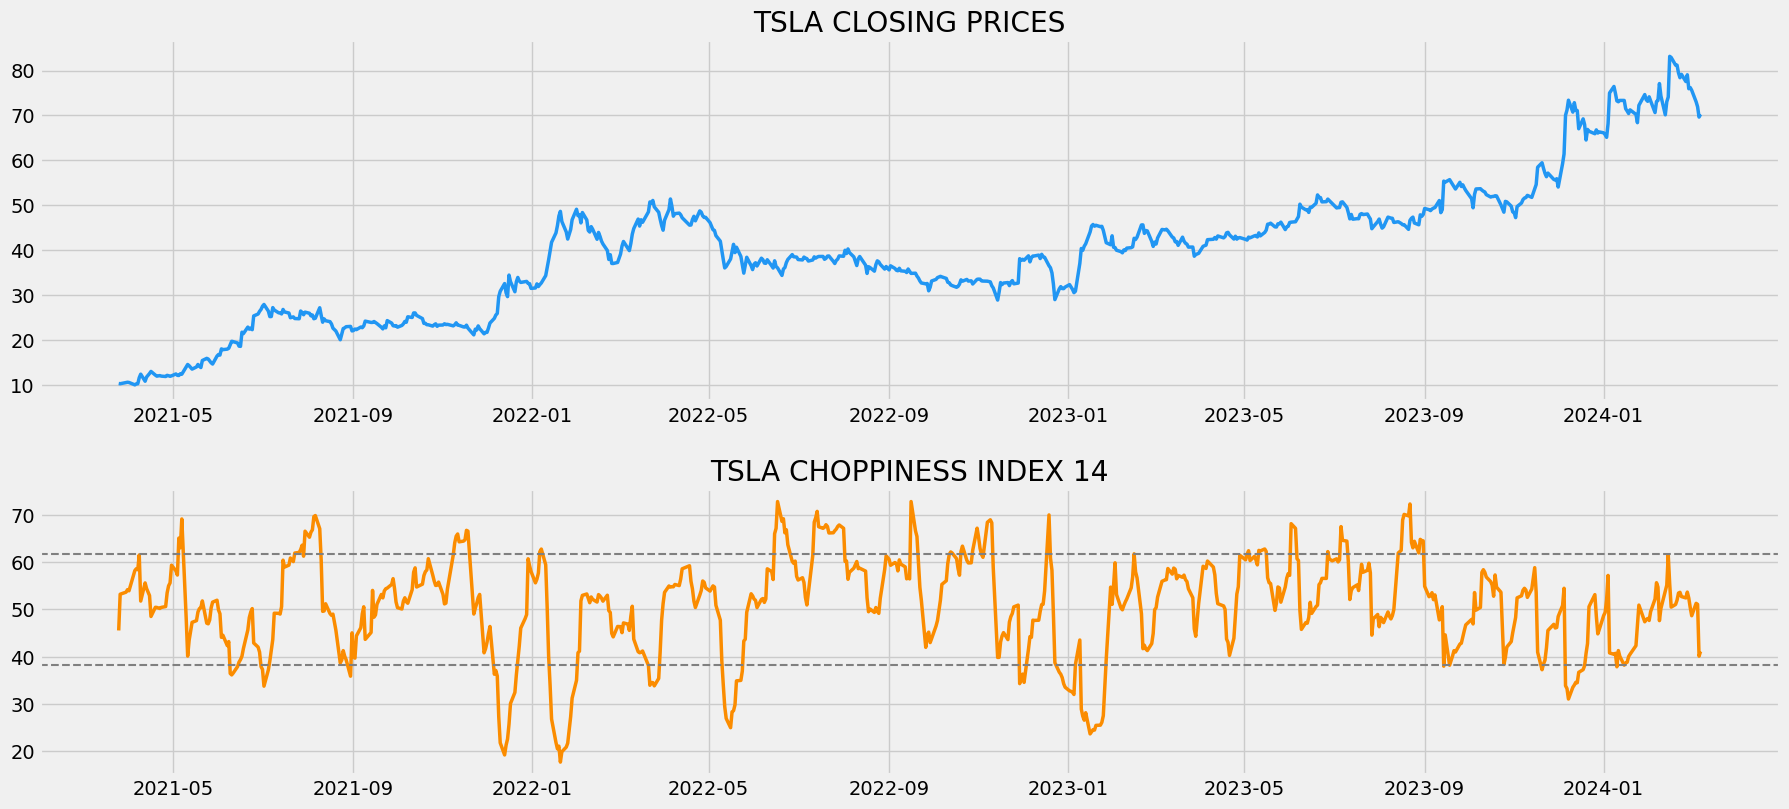

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

def get_historical_data(symbol, start_date):
    stock_data = yf.download(symbol, start=start_date)
    return stock_data

tsla = get_historical_data('BCLIND.NS', '2020-01-01')

def get_ci(high, low, close, lookback):
    tr1 = pd.DataFrame(high - low).rename(columns={'0': 'tr1'})
    tr2 = pd.DataFrame(abs(high - close.shift(1))).rename(columns={'0': 'tr2'})
    tr3 = pd.DataFrame(abs(low - close.shift(1))).rename(columns={'0': 'tr3'})
    frames = [tr1, tr2, tr3]
    tr = pd.concat(frames, axis=1, join='inner').dropna().max(axis=1)
    atr = tr.rolling(1).mean()
    highh = high.rolling(lookback).max()
    lowl = low.rolling(lookback).min()
    ci = 100 * np.log10((atr.rolling(lookback).sum()) / (highh - lowl)) / np.log10(lookback)
    return ci

tsla['ci_14'] = get_ci(tsla['High'], tsla['Low'], tsla['Close'], 14)
tsla = tsla.dropna()

ax1 = plt.subplot2grid((11, 1,), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((11, 1,), (6, 0), rowspan=4, colspan=1)
ax1.plot(tsla['Close'], linewidth=2.5, color='#2196f3')
ax1.set_title('TSLA CLOSING PRICES')
ax2.plot(tsla['ci_14'], linewidth=2.5, color='#fb8c00')
ax2.axhline(38.2, linestyle='--', linewidth=1.5, color='grey')
ax2.axhline(61.8, linestyle='--', linewidth=1.5, color='grey')
ax2.set_title('TSLA CHOPPINESS INDEX 14')
plt.show()
